## This model is about peer to peer lending loan and after applying linear regression, we can calculate Interest Rate for lending loan.

### Import Libraries

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, SelectKBest, f_regression
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression   #Linear Regression using sklearn
import statsmodels.formula.api as smf               #linear regression using stats model
import pandas_profiling as pp   #By default this package is not part of anaconda, need to install using pip or other way
#pandas_profiling is used to create data audit report

### Read .csv File

In [118]:
loan = pd.read_csv("C:/Users/abgautam/Documents/Abhishek/LoansData.csv")

In [119]:
loan.head(3)

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,1,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years


In [120]:
loan.columns

Index(['LoanID', 'Amount.Requested', 'Amount.Funded.By.Investors',
       'Interest.Rate', 'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio',
       'State', 'Home.Ownership', 'Monthly.Income', 'FICO.Range',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length'],
      dtype='object')

In [121]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
LoanID                            2500 non-null int64
Amount.Requested                  2499 non-null float64
Amount.Funded.By.Investors        2499 non-null float64
Interest.Rate                     2498 non-null object
Loan.Length                       2500 non-null object
Loan.Purpose                      2500 non-null object
Debt.To.Income.Ratio              2499 non-null object
State                             2500 non-null object
Home.Ownership                    2499 non-null object
Monthly.Income                    2499 non-null float64
FICO.Range                        2498 non-null object
Open.CREDIT.Lines                 2497 non-null float64
Revolving.CREDIT.Balance          2497 non-null float64
Inquiries.in.the.Last.6.Months    2497 non-null float64
Employment.Length                 2423 non-null object
dtypes: float64(6), int64(1), object(8)
memory usage: 293.1+ KB

#### Data Type Conversion (.astype, to_numeric)

In [122]:
loan['Interest.Rate'] = loan['Interest.Rate'].apply (lambda x: float(str(x).replace('%','')))

In [123]:
loan['Debt.To.Income.Ratio'] = loan['Debt.To.Income.Ratio'].apply(lambda x: float(str(x).replace('%','')))

In [124]:
loan.head()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,1,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99,36 months,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.0,11.71,36 months,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [125]:
loan['Employment.Length'] = loan['Employment.Length'].apply(lambda x: str(x).replace('<',''))
loan['Employment.Length'] = loan['Employment.Length'].apply(lambda x: str(x).replace('+',''))
loan['Employment.Length'] = loan['Employment.Length'].apply(lambda x: str(x).replace(' years',''))
loan['Employment.Length'] = loan['Employment.Length'].apply(lambda x: float(str(x).replace(' year','')))

In [126]:
loan['Loan.Length'] = loan['Loan.Length'].apply(lambda x: float(str(x).replace(' months','')))

In [127]:
loan.head(2)

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,1,20000.0,20000.0,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1.0
1,2,19200.0,19200.0,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2.0


In [128]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
LoanID                            2500 non-null int64
Amount.Requested                  2499 non-null float64
Amount.Funded.By.Investors        2499 non-null float64
Interest.Rate                     2498 non-null float64
Loan.Length                       2500 non-null float64
Loan.Purpose                      2500 non-null object
Debt.To.Income.Ratio              2499 non-null float64
State                             2500 non-null object
Home.Ownership                    2499 non-null object
Monthly.Income                    2499 non-null float64
FICO.Range                        2498 non-null object
Open.CREDIT.Lines                 2497 non-null float64
Revolving.CREDIT.Balance          2497 non-null float64
Inquiries.in.the.Last.6.Months    2497 non-null float64
Employment.Length                 2423 non-null float64
dtypes: float64(10), int64(1), object(4)
memory usage: 293.

In [129]:
#Splitting Fico range to two columns and then taking average
loan[['Fico_low','Fico_high']] = loan['FICO.Range'].str.split('-',expand=True)
loan['Fico_avg'] = (loan.Fico_low.astype('float') + loan.Fico_high.astype('float'))/2

In [130]:
loan = loan.drop(['FICO.Range','Fico_low','Fico_high','LoanID','Amount.Funded.By.Investors'], axis=1)

In [131]:
loan.head(2)

,Amount.Requested,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Fico_avg
0,20000.0,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,14.0,14272.0,2.0,1.0,737.0
1,19200.0,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,12.0,11140.0,1.0,2.0,717.0


In [132]:
loan['Loan.Purpose'].nunique()

14

In [133]:
loan['Home.Ownership'].nunique()

5

In [134]:
loan['State'].nunique()

46

In [135]:
#If categorical variable is >20, we cn ignore them for time being or in starting
#State has 46 categories, we are dropping state
loan = loan.drop(['State'], axis=1)

In [136]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
Amount.Requested                  2499 non-null float64
Interest.Rate                     2498 non-null float64
Loan.Length                       2500 non-null float64
Loan.Purpose                      2500 non-null object
Debt.To.Income.Ratio              2499 non-null float64
Home.Ownership                    2499 non-null object
Monthly.Income                    2499 non-null float64
Open.CREDIT.Lines                 2497 non-null float64
Revolving.CREDIT.Balance          2497 non-null float64
Inquiries.in.the.Last.6.Months    2497 non-null float64
Employment.Length                 2423 non-null float64
Fico_avg                          2498 non-null float64
dtypes: float64(10), object(2)
memory usage: 234.5+ KB


In [137]:
#Replacing .with _ in column names
loan.columns = [x.strip().replace('.','_') for x in loan.columns]

In [138]:
loan.columns

Index(['Amount_Requested', 'Interest_Rate', 'Loan_Length', 'Loan_Purpose',
       'Debt_To_Income_Ratio', 'Home_Ownership', 'Monthly_Income',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length', 'Fico_avg'],
      dtype='object')

In [139]:
loan.head()

,Amount_Requested,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_avg
0,20000.0,8.90,36.0,debt_consolidation,14.90,MORTGAGE,6541.67,14.0,14272.0,2.0,1.0,737.0
1,19200.0,12.12,36.0,debt_consolidation,28.36,MORTGAGE,4583.33,12.0,11140.0,1.0,2.0,717.0
2,35000.0,21.98,60.0,debt_consolidation,23.81,MORTGAGE,11500.00,14.0,21977.0,1.0,2.0,692.0
3,10000.0,9.99,36.0,debt_consolidation,14.30,MORTGAGE,3833.33,10.0,9346.0,0.0,5.0,697.0
4,12000.0,11.71,36.0,credit_card,18.78,RENT,3195.00,11.0,14469.0,0.0,9.0,697.0


### Assigning categorical columns to one variable and numerical columns to another variable

In [140]:
cat_vars=['Loan_Purpose','Home_Ownership']
num_vars=['Amount_Requested','Interest_Rate','Loan_Length','Debt_To_Income_Ratio','Monthly_Income'
          ,'Open_CREDIT_Lines','Revolving_CREDIT_Balance','Inquiries_in_the_Last_6_Months'
          ,'Employment_Length','Fico_avg']

In [141]:
data_cat = loan[cat_vars]
data_num = loan[num_vars]

In [142]:
data_cat.head(2)

,Loan_Purpose,Home_Ownership
0,debt_consolidation,MORTGAGE
1,debt_consolidation,MORTGAGE


In [143]:
data_num.head(2)

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_avg
0,20000.0,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0
1,19200.0,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0


In [144]:
#Checking P1(LC)
data_num.Amount_Requested.quantile(0.01)

1500.0

In [145]:
#Checking P99(UC)
data_num.Amount_Requested.quantile(0.99)

35000.0

In [146]:
#fetching values less than 1500
data_num[data_num.Amount_Requested<1500].head()

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_avg
59,1000.0,8.59,36.0,10.69,4583.33,22.0,17069.0,1.0,1.0,757.0
130,1400.0,9.76,36.0,27.14,4683.33,6.0,6466.0,0.0,2.0,732.0
178,1200.0,7.62,36.0,8.69,3833.33,14.0,350.0,1.0,7.0,732.0
280,1200.0,15.80,36.0,27.14,2166.67,9.0,9076.0,1.0,3.0,667.0
289,1000.0,10.36,36.0,0.00,1800.00,2.0,0.0,1.0,1.0,732.0


In [147]:
#fetching values greater than 35000
data_num[data_num.Amount_Requested>35000].head()

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_avg


In [148]:
#Handling outliers and assigning values LC and UC
data_num['Amount_Requested'] = data_num.Amount_Requested.clip_upper(35000)
data_num['Amount_Requested'] = data_num.Amount_Requested.clip_lower(1500)

C:\Users\abgautam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  
C:\Users\abgautam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\abgautam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\abgautam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

### Checking Max and Min value for "Amount_Requested" after handling outliers

In [149]:
data_num.Amount_Requested.max()

35000.0

In [150]:
data_num.Amount_Requested.min()

1500.0

### Function to handle Outliers and Missing values for all data set in one go

In [151]:
def outlier_miss_treat (x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    x = x.fillna(x.median())
    return x

### Applying function on numerical data set

In [152]:
data_num=data_num.apply(outlier_miss_treat)

C:\Users\abgautam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  
C:\Users\abgautam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [153]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
Amount_Requested                  2500 non-null float64
Interest_Rate                     2500 non-null float64
Loan_Length                       2500 non-null float64
Debt_To_Income_Ratio              2500 non-null float64
Monthly_Income                    2500 non-null float64
Open_CREDIT_Lines                 2500 non-null float64
Revolving_CREDIT_Balance          2500 non-null float64
Inquiries_in_the_Last_6_Months    2500 non-null float64
Employment_Length                 2500 non-null float64
Fico_avg                          2500 non-null float64
dtypes: float64(10)
memory usage: 195.4 KB


### Function to handle missing values in Categorical columns

In [154]:
def cat_miss_treat(x):
    x = x.fillna(x.mode())
    return x

### Applying function on Categorical data set

In [155]:
data_cat=data_cat.apply(cat_miss_treat)

In [156]:
data_cat.head()

,Loan_Purpose,Home_Ownership
0,debt_consolidation,MORTGAGE
1,debt_consolidation,MORTGAGE
2,debt_consolidation,MORTGAGE
3,debt_consolidation,MORTGAGE
4,credit_card,RENT


In [157]:
data_cat.Loan_Purpose.nunique()

14

In [158]:
data_cat.Home_Ownership.nunique()

5

### Creating Dummy variables for categorical variables and dropping first column

In [159]:
cat_dummies = pd.get_dummies(data_cat, drop_first=True)

In [160]:
cat_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
Loan_Purpose_credit_card           2500 non-null uint8
Loan_Purpose_debt_consolidation    2500 non-null uint8
Loan_Purpose_educational           2500 non-null uint8
Loan_Purpose_home_improvement      2500 non-null uint8
Loan_Purpose_house                 2500 non-null uint8
Loan_Purpose_major_purchase        2500 non-null uint8
Loan_Purpose_medical               2500 non-null uint8
Loan_Purpose_moving                2500 non-null uint8
Loan_Purpose_other                 2500 non-null uint8
Loan_Purpose_renewable_energy      2500 non-null uint8
Loan_Purpose_small_business        2500 non-null uint8
Loan_Purpose_vacation              2500 non-null uint8
Loan_Purpose_wedding               2500 non-null uint8
Home_Ownership_NONE                2500 non-null uint8
Home_Ownership_OTHER               2500 non-null uint8
Home_Ownership_OWN                 2500 non-null uint8
Home_Ownershi

#### Now we have clean data for numerical and categorical 
#### Concatenate Data

In [161]:
loan_data = pd.concat([data_num , cat_dummies], axis=1)

In [162]:
loan_data.head(2)

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_avg,...,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,20000.0,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0,...,0,0,0,0,0,0,0,0,0,0
1,19200.0,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 27 columns):
Amount_Requested                   2500 non-null float64
Interest_Rate                      2500 non-null float64
Loan_Length                        2500 non-null float64
Debt_To_Income_Ratio               2500 non-null float64
Monthly_Income                     2500 non-null float64
Open_CREDIT_Lines                  2500 non-null float64
Revolving_CREDIT_Balance           2500 non-null float64
Inquiries_in_the_Last_6_Months     2500 non-null float64
Employment_Length                  2500 non-null float64
Fico_avg                           2500 non-null float64
Loan_Purpose_credit_card           2500 non-null uint8
Loan_Purpose_debt_consolidation    2500 non-null uint8
Loan_Purpose_educational           2500 non-null uint8
Loan_Purpose_home_improvement      2500 non-null uint8
Loan_Purpose_house                 2500 non-null uint8
Loan_Purpose_major_purchase        2500 non-null

## Data Prepration Step -2
### Assumption of Linear Regression

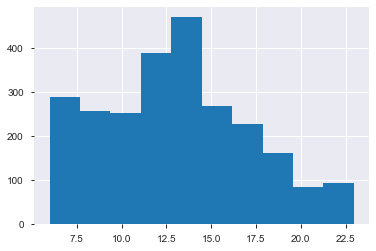

In [164]:
loan_data.Interest_Rate.hist()

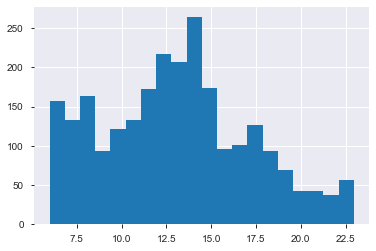

In [165]:
loan_data.Interest_Rate.hist(bins=20)

### Above graph is little skewed towards right and not normal.
#### Will apply log function to convert to normal distribution

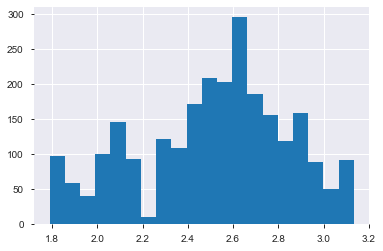

In [166]:
np.log(loan_data.Interest_Rate).hist(bins=20)

#### Adding new column which is log of Interest Rate

In [167]:
loan_data['ln_Ineterest_Rate'] = np.log(loan_data.Interest_Rate)

### Next step is to check if data has linear relationship or not
#### Correlation helps in identifying this

In [168]:
loan_data.corr()

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_avg,...,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,ln_Ineterest_Rate
Amount_Requested,1.000000,0.330780,0.412678,0.082025,0.458647,0.194894,0.342755,-0.022045,0.165058,0.081684,...,-0.146333,-0.039844,0.017778,-0.060090,-0.024480,-0.019012,-0.015984,-0.037239,-0.133911,0.301991
Interest_Rate,0.330780,1.000000,0.423147,0.173002,0.036206,0.083050,0.083611,0.170408,0.052629,-0.712008,...,0.006913,-0.030727,-0.010026,-0.023690,-0.029494,-0.027161,0.032145,-0.010484,0.074992,0.982431
Loan_Length,0.412678,0.423147,1.000000,0.025450,0.104451,0.043536,0.080894,0.031553,0.074383,0.011664,...,-0.028657,-0.021211,0.031282,-0.006390,-0.027689,-0.010599,-0.002078,-0.031505,-0.064430,0.386342
Debt_To_Income_Ratio,0.082025,0.173002,0.025450,1.000000,-0.169497,0.370845,0.219636,0.012432,0.049184,-0.218758,...,-0.048553,-0.018880,-0.074376,-0.041487,-0.027796,-0.038466,-0.002901,0.034046,-0.011685,0.178772
Monthly_Income,0.458647,0.036206,0.104451,-0.169497,1.000000,0.225932,0.434749,0.038936,0.109415,0.116830,...,-0.040797,-0.040737,0.008284,0.018925,0.000324,-0.003947,-0.000557,-0.078723,-0.210431,0.014245
Open_CREDIT_Lines,0.194894,0.083050,0.043536,0.370845,0.225932,1.000000,0.314881,0.106086,0.067021,-0.091268,...,-0.082221,-0.041644,-0.050664,-0.000109,-0.022907,-0.004812,0.040375,-0.011306,-0.154724,0.068331
Revolving_CREDIT_Balance,0.342755,0.083611,0.080894,0.219636,0.434749,0.314881,1.000000,-0.018271,0.155428,-0.010875,...,-0.047978,-0.033563,-0.052768,-0.000644,-0.029017,-0.005174,0.045893,-0.032363,-0.199250,0.079789
Inquiries_in_the_Last_6_Months,-0.022045,0.170408,0.031553,0.012432,0.038936,0.106086,-0.018271,1.000000,-0.010297,-0.088956,...,0.026848,-0.013551,0.018896,-0.006198,-0.018576,-0.015533,0.020141,-0.022319,-0.082150,0.177427
Employment_Length,0.165058,0.052629,0.074383,0.049184,0.109415,0.067021,0.155428,-0.010297,1.000000,0.017157,...,-0.049849,-0.020398,-0.012547,-0.012949,-0.035808,-0.026426,-0.001014,-0.023651,-0.225850,0.036027
Fico_avg,0.081684,-0.712008,0.011664,-0.218758,0.116830,-0.091268,-0.010875,-0.088956,0.017157,1.000000,...,-0.001851,0.021991,0.067558,0.023438,-0.007492,0.054170,-0.042408,0.005398,-0.152437,-0.744196


In [169]:
#Corrwith used to check relationship of particular column with other columns
loan_data.corrwith(loan_data.ln_Ineterest_Rate)

Amount_Requested                   0.301991
Interest_Rate                      0.982431
Loan_Length                        0.386342
Debt_To_Income_Ratio               0.178772
Monthly_Income                     0.014245
Open_CREDIT_Lines                  0.068331
Revolving_CREDIT_Balance           0.079789
Inquiries_in_the_Last_6_Months     0.177427
Employment_Length                  0.036027
Fico_avg                          -0.744196
Loan_Purpose_credit_card           0.005054
Loan_Purpose_debt_consolidation    0.133565
Loan_Purpose_educational          -0.036673
Loan_Purpose_home_improvement     -0.097748
Loan_Purpose_house                 0.003179
Loan_Purpose_major_purchase       -0.111812
Loan_Purpose_medical              -0.045235
Loan_Purpose_moving                0.009556
Loan_Purpose_other                 0.007845
Loan_Purpose_renewable_energy     -0.031531
Loan_Purpose_small_business       -0.011296
Loan_Purpose_vacation             -0.025117
Loan_Purpose_wedding            

### In above table we have relationship data with ln_Interest_Rate
### ln_Interest_Rate is derived from Interest_Rate, so we can drop ln_Interest_Rate & Interest_Rate
### We can choose variables having relationship >0.1 or <-0.1 (Atleast they should have 10% co-relation)

List of X variables having linear relationship with Y
Amount_RequestedLoan_Length
Debt_To_Income_Ratio
Inquiries_in_the_Last_6_Months
Fico_avg
Loan_Purpose_debt_consolidation
Loan_Purpose_major_purchase

### Feature Selection

In [170]:
from sklearn.feature_selection import rfe, SelectKBest, f_regression, f_oneway

In [171]:
#loan_data.columns.difference - stores all columns names except given cloumn names
#For eg - Stored all column names except Interest_Rate & ln_Interest_Rate
features = loan_data.columns.difference(['Interest_Rate','ln_Ineterest_Rate'])
X = loan_data[features]
Y = loan_data['ln_Ineterest_Rate']

### Calculating F regression

In [172]:
F_values, p_values = f_regression(X,Y)

In [173]:
F_values

array([2.50674653e+02, 8.24699064e+01, 3.24654802e+00, 3.10072444e+03,
       2.29603005e+00, 2.62865846e+00, 4.71656492e-01, 1.86167622e+01,
       8.11937401e+01, 4.38267854e+02, 6.38051931e-02, 4.53726616e+01,
       3.36416285e+00, 2.40975974e+01, 2.52433744e-02, 3.16249583e+01,
       5.12191332e+00, 2.28115373e-01, 1.53763763e-01, 2.48603541e+00,
       3.18810291e-01, 1.57692090e+00, 1.76830111e+00, 5.06966626e-01,
       1.17181882e+01, 1.60049914e+01])

In [174]:
p_values

array([7.06795949e-54, 2.12246825e-19, 7.16945719e-02, 0.00000000e+00,
       1.29831658e-01, 1.05076560e-01, 4.92289837e-01, 1.66025025e-05,
       3.96614065e-19, 8.53692410e-90, 8.00600510e-01, 2.01456973e-11,
       6.67483269e-02, 9.74776318e-07, 8.73774972e-01, 2.07811796e-08,
       2.37110423e-02, 6.32966573e-01, 6.94997662e-01, 1.14987359e-01,
       5.72374192e-01, 2.09322213e-01, 1.83713879e-01, 4.76521428e-01,
       6.28892755e-04, 6.50121839e-05])

In [175]:
f_reg_result = pd.concat([pd.Series(X.columns), pd.Series(F_values), pd.Series(p_values)], axis=1)

In [176]:
#Giving Column Names:
f_reg_result.columns = ['Feature', 'F_value', 'P_value']

In [177]:
f_reg_result

,Feature,F_value,P_value
0,Amount_Requested,250.674653,7.067959e-54
1,Debt_To_Income_Ratio,82.469906,2.122468e-19
2,Employment_Length,3.246548,7.169457e-02
3,Fico_avg,3100.724445,0.000000e+00
4,Home_Ownership_NONE,2.296030,1.298317e-01
5,Home_Ownership_OTHER,2.628658,1.050766e-01
6,Home_Ownership_OWN,0.471656,4.922898e-01
7,Home_Ownership_RENT,18.616762,1.660250e-05
8,Inquiries_in_the_Last_6_Months,81.193740,3.966141e-19
9,Loan_Length,438.267854,8.536924e-90


In [178]:
#Sort according to F values
#If F value is High, it is good
#If P value is low, It is good
f_reg_result.sort_values('F_value', ascending=False, inplace=True)

In [179]:
f_reg_result

,Feature,F_value,P_value
3,Fico_avg,3100.724445,0.000000e+00
9,Loan_Length,438.267854,8.536924e-90
0,Amount_Requested,250.674653,7.067959e-54
1,Debt_To_Income_Ratio,82.469906,2.122468e-19
8,Inquiries_in_the_Last_6_Months,81.193740,3.966141e-19
11,Loan_Purpose_debt_consolidation,45.372662,2.014570e-11
15,Loan_Purpose_major_purchase,31.624958,2.078118e-08
13,Loan_Purpose_home_improvement,24.097597,9.747763e-07
7,Home_Ownership_RENT,18.616762,1.660250e-05
25,Revolving_CREDIT_Balance,16.004991,6.501218e-05


In [180]:
#Write to csv file
f_reg_result.to_csv('f_reg_result.csv')

### Will seclect variables having strong impact on Y based on P value 
#### we can select variables having P value less than 0.05 or 0.1
##### Can see P values in CSV file

List of variables selected are
Fico_avg
Loan_Length
Amount_Requested
Debt_To_Income_Ratio
Inquiries_in_the_Last_6_Months
Loan_Purpose_debt_consolidation
Loan_Purpose_major_purchase
Loan_Purpose_home_improvement
Home_Ownership_RENT
Revolving_CREDIT_Balance
Open_CREDIT_Lines

In [181]:
#Recursive Feature Elimination
#we can give number in n_features_to_select based on how many vairables we need out of total variables
from sklearn.linear_model import LinearRegression
RFE_model = RFE(LinearRegression(), n_features_to_select=10)

In [182]:
#Apply RFE model on X & Y
RFE_model.fit(X, Y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [183]:
#It will give which variabe to consider (True) and which one to not consider (False)
RFE_model.get_support()

array([False, False, False, False,  True,  True, False, False, False,
       False,  True,  True, False, False,  True, False, False,  True,
        True, False,  True,  True,  True, False, False, False])

In [184]:
#List of columns which are being considered
X.columns[list(RFE_model.get_support())]

Index(['Home_Ownership_NONE', 'Home_Ownership_OTHER',
       'Loan_Purpose_credit_card', 'Loan_Purpose_debt_consolidation',
       'Loan_Purpose_house', 'Loan_Purpose_moving', 'Loan_Purpose_other',
       'Loan_Purpose_small_business', 'Loan_Purpose_vacation',
       'Loan_Purpose_wedding'],
      dtype='object')

In [185]:
RFE_considered_columns = X.columns[list(RFE_model.get_support())]

In [186]:
print(pd.Series(RFE_considered_columns))

0                Home_Ownership_NONE
1               Home_Ownership_OTHER
2           Loan_Purpose_credit_card
3    Loan_Purpose_debt_consolidation
4                 Loan_Purpose_house
5                Loan_Purpose_moving
6                 Loan_Purpose_other
7        Loan_Purpose_small_business
8              Loan_Purpose_vacation
9               Loan_Purpose_wedding
dtype: object


In [187]:
import scipy.stats as stats

In [188]:
#Select KBest
selectkbest = SelectKBest(f_oneway, k=10)

In [189]:
selectkbest.fit(X,Y)

SelectKBest(k=10, score_func=<function f_oneway at 0x000001F95D9D9B88>)

In [190]:
selectkbest.get_support()

array([False, False, False,  True,  True,  True, False, False, False,
       False, False, False,  True, False,  True, False,  True,  True,
       False,  True, False,  True,  True, False, False, False])

In [191]:
#List of columns which are being considered
X.columns[list(selectkbest.get_support())]

Index(['Fico_avg', 'Home_Ownership_NONE', 'Home_Ownership_OTHER',
       'Loan_Purpose_educational', 'Loan_Purpose_house',
       'Loan_Purpose_medical', 'Loan_Purpose_moving',
       'Loan_Purpose_renewable_energy', 'Loan_Purpose_vacation',
       'Loan_Purpose_wedding'],
      dtype='object')

In [192]:
selectkbest_considered_columns = X.columns[list(selectkbest.get_support())]

In [193]:
print(pd.Series(selectkbest_considered_columns))

0                         Fico_avg
1              Home_Ownership_NONE
2             Home_Ownership_OTHER
3         Loan_Purpose_educational
4               Loan_Purpose_house
5             Loan_Purpose_medical
6              Loan_Purpose_moving
7    Loan_Purpose_renewable_energy
8            Loan_Purpose_vacation
9             Loan_Purpose_wedding
dtype: object


### List of all variables from co-relation, f_regression, RFE & SelectKMethod (removed duplicates)

In [194]:
X_new = X[['Amount_Requested','Loan_Length','Debt_To_Income_Ratio','Fico_avg','Home_Ownership_NONE','Home_Ownership_OTHER','Home_Ownership_RENT','Inquiries_in_the_Last_6_Months','Loan_Purpose_credit_card','Loan_Purpose_debt_consolidation','Loan_Purpose_educational','Loan_Purpose_home_improvement','Loan_Purpose_house','Loan_Purpose_major_purchase','Loan_Purpose_medical','Loan_Purpose_moving','Loan_Purpose_other','Loan_Purpose_renewable_energy','Loan_Purpose_small_business','Loan_Purpose_vacation','Loan_Purpose_wedding','Open_CREDIT_Lines','Revolving_CREDIT_Balance']]

In [195]:
len(X_new.columns)

23

### Reducing further list of variables using VIF (By removing multicollinierity)

In [196]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [197]:
VIF = [variance_inflation_factor(X_new.values, i) for i in range (X_new.shape[1])]

### Checking VIF values

In [198]:
VIF_results = pd.concat([pd.Series(X_new.columns), pd.Series(VIF)], axis=1)
VIF_results.columns = ['Column_Names', 'VIF_value']
VIF_results.sort_values('VIF_value', ascending = False, inplace = True)
VIF_results

,Column_Names,VIF_value
3,Fico_avg,61.443158
9,Loan_Purpose_debt_consolidation,24.104769
1,Loan_Length,21.514714
8,Loan_Purpose_credit_card,8.822896
21,Open_CREDIT_Lines,8.085029
2,Debt_To_Income_Ratio,6.357232
0,Amount_Requested,5.179325
16,Loan_Purpose_other,4.536942
11,Loan_Purpose_home_improvement,3.818293
13,Loan_Purpose_major_purchase,2.846424


### Will remove variables with highest VIF value and check again and repeat this process untill all variables have VIF less than 5
#### But if some variables are important but their VIF value is high like Fico_avg is important and high value, so we will try to remove other columns having VIF values high and are not very impotant one by one untill we get VIF value for all variables close to 5 or less than 5

In [199]:
#Will remove vairable with highest VIF value and check result again
X_new=X_new[X_new.columns.difference(['Loan_Purpose_debt_consolidation','Loan_Length','Open_CREDIT_Lines','Debt_To_Income_Ratio','Employment_Length','Revolving_CREDIT_Balance','Home_Ownership_RENT'])]

In [200]:
VIF = [variance_inflation_factor(X_new.values, i) for i in range (X_new.shape[1])]

In [201]:
VIF_results = pd.concat([pd.Series(X_new.columns), pd.Series(VIF)], axis=1)
VIF_results.columns = ['Column_Names', 'VIF_value']
VIF_results.sort_values('VIF_value', ascending = False, inplace = True)
VIF_results

,Column_Names,VIF_value
1,Fico_avg,5.775424
0,Amount_Requested,3.816253
4,Inquiries_in_the_Last_6_Months,1.605244
5,Loan_Purpose_credit_card,1.329892
12,Loan_Purpose_other,1.192121
7,Loan_Purpose_home_improvement,1.122241
9,Loan_Purpose_major_purchase,1.103967
14,Loan_Purpose_small_business,1.067533
10,Loan_Purpose_medical,1.034368
16,Loan_Purpose_wedding,1.031045


In [202]:
VIF_results.count()

Column_Names    17
VIF_value       17
dtype: int64

In [203]:
X_new.columns

Index(['Amount_Requested', 'Fico_avg', 'Home_Ownership_NONE',
       'Home_Ownership_OTHER', 'Inquiries_in_the_Last_6_Months',
       'Loan_Purpose_credit_card', 'Loan_Purpose_educational',
       'Loan_Purpose_home_improvement', 'Loan_Purpose_house',
       'Loan_Purpose_major_purchase', 'Loan_Purpose_medical',
       'Loan_Purpose_moving', 'Loan_Purpose_other',
       'Loan_Purpose_renewable_energy', 'Loan_Purpose_small_business',
       'Loan_Purpose_vacation', 'Loan_Purpose_wedding'],
      dtype='object')

In [204]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
Amount_Requested                  2500 non-null float64
Fico_avg                          2500 non-null float64
Home_Ownership_NONE               2500 non-null uint8
Home_Ownership_OTHER              2500 non-null uint8
Inquiries_in_the_Last_6_Months    2500 non-null float64
Loan_Purpose_credit_card          2500 non-null uint8
Loan_Purpose_educational          2500 non-null uint8
Loan_Purpose_home_improvement     2500 non-null uint8
Loan_Purpose_house                2500 non-null uint8
Loan_Purpose_major_purchase       2500 non-null uint8
Loan_Purpose_medical              2500 non-null uint8
Loan_Purpose_moving               2500 non-null uint8
Loan_Purpose_other                2500 non-null uint8
Loan_Purpose_renewable_energy     2500 non-null uint8
Loan_Purpose_small_business       2500 non-null uint8
Loan_Purpose_vacation             2500 non-null uint8
Loan_Purpose_wedding   

### Above list is final list after variable reduction and having mainly 5 columns because "Home_Ownership & Loan_Purpose" are same column

## Split data into train and test

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
data_new2 = pd.concat([X_new, Y], axis=1)

In [207]:
data_new2.head(2)

,Amount_Requested,Fico_avg,Home_Ownership_NONE,Home_Ownership_OTHER,Inquiries_in_the_Last_6_Months,Loan_Purpose_credit_card,Loan_Purpose_educational,Loan_Purpose_home_improvement,Loan_Purpose_house,Loan_Purpose_major_purchase,Loan_Purpose_medical,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,ln_Ineterest_Rate
0,20000.0,737.0,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,2.186051
1,19200.0,717.0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,2.494857


In [208]:
#test_size here means test data will be 30% and train data will be 70%
train, test = train_test_split(data_new2, test_size = 0.3, random_state = 123)

## Model Building

In [209]:
import statsmodels.formula.api as smf

In [210]:
#List of columns
train.columns

Index(['Amount_Requested', 'Fico_avg', 'Home_Ownership_NONE',
       'Home_Ownership_OTHER', 'Inquiries_in_the_Last_6_Months',
       'Loan_Purpose_credit_card', 'Loan_Purpose_educational',
       'Loan_Purpose_home_improvement', 'Loan_Purpose_house',
       'Loan_Purpose_major_purchase', 'Loan_Purpose_medical',
       'Loan_Purpose_moving', 'Loan_Purpose_other',
       'Loan_Purpose_renewable_energy', 'Loan_Purpose_small_business',
       'Loan_Purpose_vacation', 'Loan_Purpose_wedding', 'ln_Ineterest_Rate'],
      dtype='object')

### Concatenate list of columns with '+' symbol because we need list of X variables like this in function
### Removing Y variable (ln_Interest_Rate) because we dont need it to be concatenated with X variables

### Function for defining linear model
#### Model Formula :

model = smf.ols(formula = 'y~x1+x2+x3', data=train)
model = model.fit()

In [211]:
'+'.join(train.columns.difference(['ln_Ineterest_Rate']))

'Amount_Requested+Fico_avg+Home_Ownership_NONE+Home_Ownership_OTHER+Inquiries_in_the_Last_6_Months+Loan_Purpose_credit_card+Loan_Purpose_educational+Loan_Purpose_home_improvement+Loan_Purpose_house+Loan_Purpose_major_purchase+Loan_Purpose_medical+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_renewable_energy+Loan_Purpose_small_business+Loan_Purpose_vacation+Loan_Purpose_wedding'

In [212]:
formula = 'ln_Ineterest_Rate' + '~' + '+'.join(train.columns.difference(['ln_Ineterest_Rate']))

In [213]:
formula

'ln_Ineterest_Rate~Amount_Requested+Fico_avg+Home_Ownership_NONE+Home_Ownership_OTHER+Inquiries_in_the_Last_6_Months+Loan_Purpose_credit_card+Loan_Purpose_educational+Loan_Purpose_home_improvement+Loan_Purpose_house+Loan_Purpose_major_purchase+Loan_Purpose_medical+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_renewable_energy+Loan_Purpose_small_business+Loan_Purpose_vacation+Loan_Purpose_wedding'

In [214]:
model = smf.ols(formula, data=train)
model = model.fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:      ln_Ineterest_Rate   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     260.1
Date:                Fri, 22 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:43:45   Log-Likelihood:                 516.95
No. Observations:                1750   AIC:                            -997.9
Df Residuals:                    1732   BIC:                            -899.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

### Will drop Insignificant variables where P value is >0.05

In [215]:
formula = 'ln_Ineterest_Rate' + '~' + '+'.join(train.columns.difference(['ln_Ineterest_Rate','Loan_Purpose_vacation','Loan_Purpose_renewable_energy','Loan_Purpose_medical','Loan_Purpose_educational','Home_Ownership_OTHER','Home_Ownership_NONE','Home_Ownership_OWN','Loan_Purpose_home_improvement','Loan_Purpose_house','Loan_Purpose_moving','Loan_Purpose_wedding']))

In [216]:
model = smf.ols(formula, data=train)
model = model.fit()
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:      ln_Ineterest_Rate   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     628.1
Date:                Fri, 22 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:43:45   Log-Likelihood:                 509.85
No. Observations:                1750   AIC:                            -1004.
Df Residuals:                    1742   BIC:                            -960.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

### In Above summary if t value is high then that is the most important variable :

Formula based on Model is :
ln_Interest_Rate = Amount_Requested*1.678e-05 + Fico_avg*-0.0075 + Inquiries_in_the_Last_6_Months*0.0352 +
Loan_Purpose_credit_card*-0.0470 + Loan_Purpose_major_purchase*0.0488 + Loan_Purpose_other*0.0733 +
Loan_Purpose_small_business*.0501 + 7.5871

Interest_Rate = exp(ln_Inetrest_Rate)

So order of important variables are :
1)Fico_avg
2)Amount_Requested
3)Inquiries_in_the_Last_6_Months  
4)Loan_Purpose_other
5)Loan_Purpose_credit_card
6)Loan_Purpose_major_purchase 
7)Loan_Purpose_small_business 


## Model Validation:

In [217]:
#We are taking np.exp because our Y variable is log of Interest_Rate
train_pred = np.exp(model.predict(train))
test_pred = np.exp(model.predict(test))

In [218]:
#We are taking np.exp because our Y variable is log of Interest_Rate
train_y = np.exp(train.ln_Ineterest_Rate)
test_y = np.exp(test.ln_Ineterest_Rate)

### Metrics for train data:

In [219]:
#Mean absolute percentage error - MAPE
MAPE_train = np.mean(np.abs(train_y-train_pred)/train_y)
print(MAPE_train)
#Square root of mean square error
RMSE_train = np.sqrt(np.mean(np.square(train_y-train_pred)))
print(RMSE_train)
#Root mean square percentage error
RMSP_train = np.sqrt(np.mean(np.square(train_y-train_pred)/train_y))
print(RMSP_train)
#Correlation Metrics
corr_train = np.corrcoef(train_y, train_pred)[1][0]
print(corr_train)

0.14204579567898237
2.2331050785043547
0.6197858483278996
0.8438900770459166


### Metrics for test data:

In [220]:
#Mean absolute percentage error - MAPE
MAPE_test = np.mean(np.abs(test_y-test_pred)/test_y)
print(MAPE_test)
#Square root of mean square error
RMSE_test = np.sqrt(np.mean(np.square(test_y - test_pred)))
print(RMSE_test)
#Root mean square percentage error
RMSP_test = np.sqrt(np.mean(np.square(test_y - test_pred)/test_y))
print(RMSP_test)
#Correlation Metrics
corr_test = np.corrcoef(test_y, test_pred)[1][0]
print(corr_test)

0.14750240590455327
2.3197080856150794
0.643743589291323
0.8321835739129096


### Metrics data is coming similar for train and test data
#### Means model is working fine

#### Saving Model as object
#### Suppose in future, if I get new data and I want to use this model then we can make use of it

In [221]:
import pickle
#now you can save it to a file
with open('loan_reg_model','wb') as f:
    pickle.dump(model, f)

### Check assumptions of Linear Regression using errors (Bias, Residuals)

In [222]:
model.resid.head()

1351   -0.035980
903     0.305513
2049    0.005955
798     0.337126
1360   -0.030809
dtype: float64

### To check if residuals are following normal distribution or not

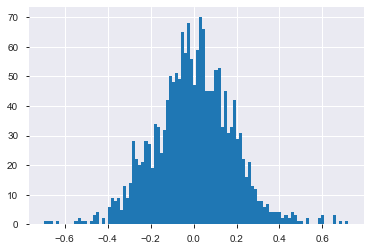

In [223]:
model.resid.hist(bins=100)

### Check assumptions of Linear Regression using Co-relations
#### y = actual & pred = prediction
#### Co-relation should be high

In [224]:
np.corrcoef(train_y, train_pred)

array([[1.        , 0.84389008],
       [0.84389008, 1.        ]])

##### In above metrics, Co-relation between actual and prediction is high

### y = actual & resid = residual (Error)
#### co-relation should be low

In [225]:
np.corrcoef(train_y, model.resid)

array([[1.        , 0.52629863],
       [0.52629863, 1.        ]])

##### in above metrics, co-relation is not low which implicates model is not perfect.

#### Co-relation tells if high value predicted as high and low value predicted as low value or not but does not tell what value is precited.
#### So we go wtih decile analysis as well for actaul and predicted value and check if they are coming similar or not.

### Model validation using decile analysis

#### Check assumptions of Linear Regression using Decile Analysis

In [226]:
train_new = pd.concat([train_y, train_pred], axis=1)
train_new.columns = ['actual','pred']
test_new = pd.concat([test_y, test_pred], axis=1)
test_new.columns = ['actual','pred']

In [227]:
train_new.head()

,actual,pred
1351,10.74,11.133456
903,9.32,6.866469
2049,14.65,14.563022
798,12.18,8.694310
1360,14.09,14.530848


In [228]:
train_new['Deciles'] = pd.qcut(train_new.pred, 10, labels=False)

In [229]:
train_new.head()

,actual,pred,Deciles
1351,10.74,11.133456,3
903,9.32,6.866469,0
2049,14.65,14.563022,6
798,12.18,8.694310,1
1360,14.09,14.530848,6


In [230]:
#Actual & Predicted should be similar 
train_new.groupby('Deciles').mean()

,actual,pred
Deciles,,
0,7.462366,6.992179
1,8.744263,8.990606
2,9.777600,10.347575
3,11.548857,11.416473
4,12.783771,12.407240
5,13.546229,13.340801
6,14.679714,14.263581
7,15.795257,15.183595
8,16.789943,16.214508


In [231]:
test_new['Deciles']=pd.qcut(test_new.pred, 10, labels=False)

In [232]:
#Actual & Predicted should be similar 
test_new.groupby('Deciles').mean()

,actual,pred
Deciles,,
0,7.777067,7.055170
1,8.889867,9.317640
2,10.324000,10.546000
3,11.500933,11.597560
4,12.765333,12.513082
5,13.921818,13.347130
6,14.727123,14.157044
7,15.559733,15.015880
8,16.738800,16.293275
